Text Generation Results:
    Model  Perplexity  BLEU  Diversity  Latency  TOPSIS Score  Rank
1  GPT-3           8  0.78       0.68      300      0.578835   1.0
0  GPT-2          10  0.72       0.65      250      0.440545   2.0
2  LLaMA           9  0.74       0.66      230      0.356590   3.0


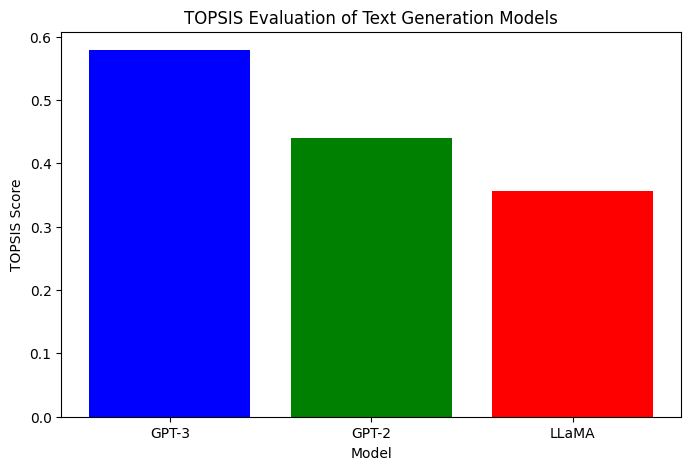

+----+---------+--------------+--------+-------------+-----------+----------------+--------+
|    | Model   |   Perplexity |   BLEU |   Diversity |   Latency |   TOPSIS Score |   Rank |
+====+=========+==============+========+=============+===========+================+========+
|  1 | GPT-3   |            8 |   0.78 |        0.68 |       300 |       0.578835 |      1 |
+----+---------+--------------+--------+-------------+-----------+----------------+--------+
|  0 | GPT-2   |           10 |   0.72 |        0.65 |       250 |       0.440545 |      2 |
+----+---------+--------------+--------+-------------+-----------+----------------+--------+
|  2 | LLaMA   |            9 |   0.74 |        0.66 |       230 |       0.35659  |      3 |
+----+---------+--------------+--------+-------------+-----------+----------------+--------+


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

def topsis(data, weights):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data.iloc[:, 1:])
    weighted_data = normalized_data * weights
    ideal_best = np.max(weighted_data, axis=0)
    ideal_worst = np.min(weighted_data, axis=0)
    distance_best = np.sqrt(np.sum((weighted_data - ideal_best) ** 2, axis=1))
    distance_worst = np.sqrt(np.sum((weighted_data - ideal_worst) ** 2, axis=1))
    topsis_score = distance_worst / (distance_best + distance_worst)
    data['TOPSIS Score'] = topsis_score
    data['Rank'] = data['TOPSIS Score'].rank(ascending=False)
    return data.sort_values(by='Rank')

data_generation = pd.DataFrame({
    "Model": ["GPT-2", "GPT-3", "LLaMA"],
    "Perplexity": [10, 8, 9],
    "BLEU": [0.72, 0.78, 0.74],
    "Diversity": [0.65, 0.68, 0.66],
    "Latency": [250, 300, 230]
})
weights_generation = [0.3, 0.3, 0.2, 0.2]
results_generation = topsis(data_generation, weights_generation)
print("Text Generation Results:\n", results_generation)
results_generation.to_csv('results_generation.csv', index=False)

plt.figure(figsize=(8, 5))
plt.bar(results_generation['Model'], results_generation['TOPSIS Score'], color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Evaluation of Text Generation Models")
plt.show()

print(tabulate(results_generation, headers='keys', tablefmt='grid'))
